INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


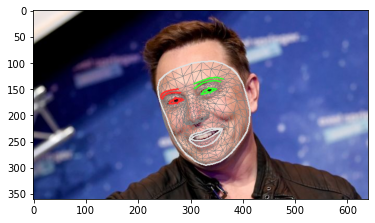

True

In [1]:
import cv2
import mediapipe as mp
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
%matplotlib inline 

def look_img(img):
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

mp_face_mesh = mp.solutions.face_mesh

#import model
model = mp_face_mesh.FaceMesh(
    static_image_mode=True, # is it a still picture or a continuous video frame
    max_num_faces=5,
    refine_landmarks=True, # whether to smooth keypoints
    min_detection_confidence=0.5, # confidence threshold
    min_tracking_confidence=0.5, # tracking threshold
)

# drawing tools
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

img = cv2.imread('musk.png')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = model.process(img_RGB)

annotated_image = img.copy() 

# draw face surfaces and outlines of key areas
if results.multi_face_landmarks: # if a face is detected
    for face_landmarks in results.multi_face_landmarks:

        # draw face mesh
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style()
        )
        
        # draw face contours, eyelashes, eye sockets, lips
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style()
        )
    
        # draw pupil area
        mp_drawing.draw_landmarks(
            image=annotated_image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_IRISES,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style()
        )

look_img(annotated_image)
cv2.imwrite('Test.jpg', annotated_image)